In [ ]:
!pip install -qq transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import transformers
from transformers import AutoImageProcessor, BeitModel, BeitForImageClassification
import torch
import cv2
from matplotlib import pyplot as plt
import torch.nn as nn

In [ ]:
#mount google drive

In [ ]:
!unzip '/content/drive/MyDrive/Emotic/basic/Annotation/manual.zip'

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Emotic/basic/EmoLabel/list_patition_label.txt", sep = " ", names = ['file_name', 'label'])
df1['eye1x'] = 0
df1['eye1y'] = 0
df1['eye2x'] = 0
df1['eye2y'] = 0
df1['nosex'] = 0
df1['nosey'] = 0
df1['mouth_corner1x'] = 0
df1['mouth_corner1y'] = 0
df1['mouth_corner2x'] = 0
df1['mouth_corner2y'] = 0
df1['gender'] = 0
df1['race'] = 0
df1['age'] = 0
df1

,file_name,label,eye1x,eye1y,eye2x,eye2y,nosex,nosey,mouth_corner1x,mouth_corner1y,mouth_corner2x,mouth_corner2y,gender,race,age
0,train_00001.jpg,5,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_00002.jpg,5,0,0,0,0,0,0,0,0,0,0,0,0,0
2,train_00003.jpg,4,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_00004.jpg,4,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_00005.jpg,5,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15334,test_3064.jpg,7,0,0,0,0,0,0,0,0,0,0,0,0,0
15335,test_3065.jpg,7,0,0,0,0,0,0,0,0,0,0,0,0,0
15336,test_3066.jpg,7,0,0,0,0,0,0,0,0,0,0,0,0,0
15337,test_3067.jpg,7,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
emotions = {1: 'Surprise',
2: 'Fear',
3: 'Disgust',
4: 'Happiness',
5: 'Sadness',
6: 'Anger',
7: 'Neutral'}

columns = df1.columns[-13:]

In [ ]:
file_names = df1['file_name']
file_names

0        train_00001.jpg
1        train_00002.jpg
2        train_00003.jpg
3        train_00004.jpg
4        train_00005.jpg
              ...       
15334      test_3064.jpg
15335      test_3065.jpg
15336      test_3066.jpg
15337      test_3067.jpg
15338      test_3068.jpg
Name: file_name, Length: 15339, dtype: object

In [ ]:
for i in range(len(file_names)):
  name = '/content/manual/' + file_names[i][:-4] + '_manu_attri.txt'
  f1 = open(name, 'r')
  values = []
  for line in f1:
    values.extend(map(float, line.strip().split()))
  df1.loc[i, columns] = values

df1

,file_name,label,eye1x,eye1y,eye2x,eye2y,nosex,nosey,mouth_corner1x,mouth_corner1y,mouth_corner2x,mouth_corner2y,gender,race,age
0,train_00001.jpg,5,270.170,330.696,374.086,302.670,325.068,401.369,312.030,445.782,399.256,424.842,1,0,2
1,train_00002.jpg,5,532.365,573.652,753.071,574.156,604.688,702.167,563.467,861.359,736.370,850.951,1,0,2
2,train_00003.jpg,4,463.469,554.446,596.902,515.023,472.566,621.163,475.599,748.531,604.484,718.206,1,2,2
3,train_00004.jpg,4,296.590,316.573,422.501,318.766,343.181,396.697,308.442,447.725,409.337,449.888,1,0,2
4,train_00005.jpg,5,161.180,181.754,221.991,174.016,201.838,208.206,181.003,247.750,224.371,243.475,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15334,test_3064.jpg,7,178.913,193.558,245.555,195.353,204.949,220.679,185.160,257.397,233.103,260.915,2,0,0
15335,test_3065.jpg,7,292.557,307.178,393.183,309.758,339.000,369.102,305.458,423.285,375.982,426.725,0,0,2
15336,test_3066.jpg,7,100.466,104.831,134.872,104.205,120.423,121.897,105.266,142.293,131.038,143.423,1,2,2
15337,test_3067.jpg,7,93.244,99.546,125.329,94.676,121.891,118.167,99.973,136.930,127.621,132.777,0,0,2


In [ ]:
# df1.to_csv("Emotions_Dataframe.csv")

In [ ]:
!unzip '/content/drive/MyDrive/Emotic/basic/Image/aligned.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train_07272_aligned.jpg  
  inflating: train_07273_aligned.jpg  
  inflating: train_07274_aligned.jpg  
  inflating: train_07275_aligned.jpg  
  inflating: train_07276_aligned.jpg  
  inflating: train_07277_aligned.jpg  
  inflating: train_07278_aligned.jpg  
  inflating: train_07279_aligned.jpg  
  inflating: train_07280_aligned.jpg  
  inflating: train_07281_aligned.jpg  
  inflating: train_07282_aligned.jpg  
  inflating: train_07283_aligned.jpg  
  inflating: train_07284_aligned.jpg  
  inflating: train_07285_aligned.jpg  
  inflating: train_07286_aligned.jpg  
  inflating: train_07287_aligned.jpg  
  inflating: train_07288_aligned.jpg  
  inflating: train_07289_aligned.jpg  
  inflating: train_07290_aligned.jpg  
  inflating: train_07291_aligned.jpg  
  inflating: train_07292_aligned.jpg  
  inflating: train_07293_aligned.jpg  
  inflating: train_07294_aligned.jpg  
  inflating: train_07295_aligned.jpg  
  inflating: 

In [ ]:
img1 = df1['file_name'][84]
img2 = df1['file_name'][900]

[[[  9  17  24]
  [  2  11  20]
  [  3  13  23]
  ...
  [ 65  69 128]
  [ 72  76 135]
  [ 81  85 144]]

 [[  1   9  16]
  [  6  16  23]
  [ 22  32  42]
  ...
  [ 64  68 127]
  [ 69  73 132]
  [ 77  81 140]]

 [[ 16  22  27]
  [ 30  39  43]
  [ 49  58  67]
  ...
  [ 63  64 124]
  [ 68  69 129]
  [ 76  77 137]]

 ...

 [[  7   9   9]
  [  6   8   8]
  [  5   7   7]
  ...
  [ 53  57 105]
  [ 52  56 104]
  [ 52  56 104]]

 [[  7   9   9]
  [  6   8   8]
  [  5   7   7]
  ...
  [ 55  59 107]
  [ 52  56 104]
  [ 52  56 104]]

 [[  7   9   9]
  [  6   8   8]
  [  5   7   7]
  ...
  [ 56  60 108]
  [ 53  57 105]
  [ 52  56 104]]]


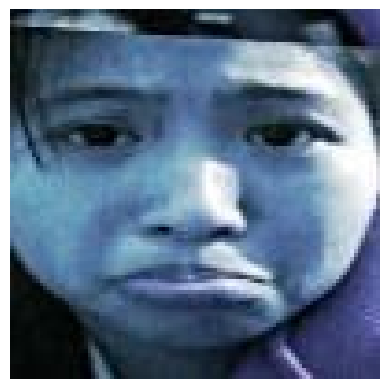

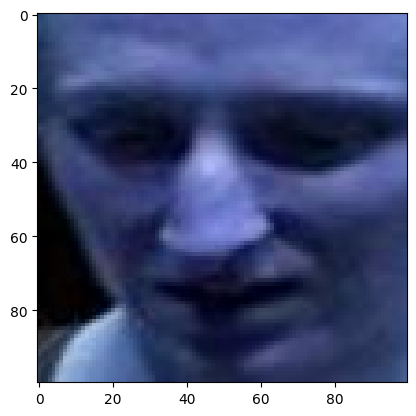

In [ ]:
img_color1 = cv2.imread('test_0001_aligned.jpg',1)
print(img_color1)
img_color2 = cv2.imread('test_0089_aligned.jpg',1)
plt.imshow(img_color1)
plt.axis("off")
plt.show()
plt.imshow(img_color2)
plt.show()

In [ ]:
image_processor = AutoImageProcessor.from_pretrained("microsoft/beit-base-patch16-224-pt22k")
model = BeitModel.from_pretrained("microsoft/beit-base-patch16-224-pt22k")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of the model checkpoint at microsoft/beit-base-patch16-224-pt22k were not used when initializing BeitModel: ['lm_head.weight', 'lm_head.bias', 'layernorm.weight', 'layernorm.bias']
- This IS expected if you are initializing BeitModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BeitModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BeitModel were not initialized from the model checkpoint at microsoft/beit-base-patch16-224-pt22k and are newly initialized: ['beit.pooler.layernorm.bias', 'beit.poo

In [ ]:
device = "cuda" if torch.cuda.is_available() else 'cpu'
model.to(device)

BeitModel(
  (embeddings): BeitEmbeddings(
    (patch_embeddings): BeitPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): BeitEncoder(
    (relative_position_bias): BeitRelativePositionBias()
    (layer): ModuleList(
      (0): BeitLayer(
        (attention): BeitAttention(
          (attention): BeitSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=False)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): BeitSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): BeitIntermediate(
          (dense): Linear(in_features=768, out_features=3072, 

In [ ]:
input1 = image_processor(img_color1, return_tensors="pt")
input1 = input1['pixel_values'].to(device)
output1 = model(input1)
last_hidden_states1 = output1.last_hidden_state
print(last_hidden_states1.size())
print(last_hidden_states1[0][0].size())
input2 = image_processor(img_color2, return_tensors="pt")
input2 = input2['pixel_values'].to(device)
output2 = model(input2)
last_hidden_states2 = output2.last_hidden_state
print(last_hidden_states2.size())
print(last_hidden_states2[0][0].size())

torch.Size([1, 197, 768])
torch.Size([768])
torch.Size([1, 197, 768])
torch.Size([768])


In [ ]:
last_hidden_states1 = torch.sum(last_hidden_states1, dim = 1)
last_hidden_states2 = torch.sum(last_hidden_states2, dim = 1)
cos = nn.CosineSimilarity(dim=1, eps=1e-6)
output = cos(last_hidden_states1, last_hidden_states2)
print(output)

tensor([0.9495], device='cuda:0', grad_fn=<SumBackward1>)


In [ ]:
model2 = BeitForImageClassification.from_pretrained("microsoft/beit-base-patch16-224")
model2.config

BeitConfig {
  "_name_or_path": "microsoft/beit-base-patch16-224",
  "architectures": [
    "BeitForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "auxiliary_channels": 256,
  "auxiliary_concat_input": false,
  "auxiliary_loss_weight": 0.4,
  "auxiliary_num_convs": 1,
  "drop_path_rate": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "tench, Tinca tinca",
    "1": "goldfish, Carassius auratus",
    "2": "great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias",
    "3": "tiger shark, Galeocerdo cuvieri",
    "4": "hammerhead, hammerhead shark",
    "5": "electric ray, crampfish, numbfish, torpedo",
    "6": "stingray",
    "7": "cock",
    "8": "hen",
    "9": "ostrich, Struthio camelus",
    "10": "brambling, Fringilla montifringilla",
    "11": "goldfinch, Carduelis carduelis",
    "12": "house finch, linnet, Carpodacus mexicanus",
    "13": "junco, snowbird",
    "14": "indigo 